Capstone Project
Danny Clifford
December 31st, 2050


# I. Definition

### Project Overview

With much better memory than people and the amount of personal information we share with computers, it's amazing they don't appear to understand our personalities better.  With the exceptions of saving searches and some companies using AI and machine learning to predict profitability for advertisements, there is little effort to understand personal tendencies to cater content for (and not just to) individuals. Even those multibillion dollar corporations aim to maximize advertisment profit, not to understand the fundamental features that make each of us unique.  

Understanding what connects us all, what makes each of us unique, what are our strengths and how can we harness everyone's strengths to build better lives for individuals and humanity, seem's far from the focus of their efforts.  For the first time in history, we are able to economically collect and process enough information to understand the patterns of human nature.  There have been good attempts in recent history of distinguishing the features of human processing that make certain people different than others, most notably Carl Jung in his book Psychological Types and the subsequent adaptation of his theories to the Myers Briggs Personality Index.  

Carl Jung notes that it is difficult for a person who experiences their own bias to accurately judge others, joking that one person creating a system would be like creating a Universal Church with one member.  Luckily, since his time wonderful scientists such as Alan Turing, John von Neumann, J.C.R. Licklider, Miller, Moore, Noyce, and countless other have made it incredibly easy to collect, share, and calculate data from around the world almost instantly, not to mention make impressive improvements on models of understanding how agents behave.  With the addition of breakthroughs in behavioral psychology by greats like Kahnemann, Tversky, and Thaler, we are quickly building the ability to study the patterns of reason and thought in humans as differentiated by the rational agents which traditional economic theory implies.

Putting these pieces together, as we communicate with computers and people, we are creating valuable information and patterns that, if only captured and studied, would give great insight into how our individual and collective minds work.  This project is about helping computers understand how the patterns in our language reflect our inner personality and in turn how we recieve, process, and communicate information.  Ultimately, computers can be our tools to help us learn our unique patterns and to help us change, supplement, or leverage how we do things to help us achieve our goals.

### Problem Statement
    
The problem that I am setting out to solve is how to understand someone's personality based on their use of language.  If we can accurately predict one of the most fundamental aspects of a person’s behavior and uniqueness based off the language they use, the ability to communicate information to that person will be drastically improved.  The internet is designed based on information that is already programmed into the web page itself; for example, administrators see a website much differently as a new customer or even a logged in user and are determined prior to visiting the webpage. This poses a difficult design problem for web designers to incorporate designs that maximize the profit or usefulness to their intended audience rather than communicating information or value to a person on an individual basis.  If we can predict learning style or how an individual will react to their environment, then we can better customize the learning experience to their preference. 
    
Quantifying personality has been done for us with the Myers Brigg Personality Index 4 letter code. These will be further broken down into their 4 features of a single letter with only 2 options, making it a binary choice and easy to encode the data.  In addition, it will also allow us to train the weights of determining individual features of personality in a more focused way. NLP allows algorithms to extract meaning from text whether from word count, frequency, and even parts of speech in a quantifiable and measurable way. These matrices of language data will be learned by a Neural Network and these patterns during training will be used to predict the personality features of the test group.  

1. Download the data from Kaggle
2. Let SpaCy web-medium run through the posts to make word vectors
3. Shuffle-Split the data into testing validation and training data.
4. Run benchmarks training and testing with Logistic Regression, Random Forest, and MLP Classifiers
5. Run training and validation through the CNN
5. Test accuracy of the model on the test set with AUC
    
    
### Metrics

Training a neural network on language use and their corresponding personality feature labels allows us to measure the AUC.  Area under the ROC curve is used to ensure the proper binary classification when it comes to specificity and sensitivity. This will help better quantify individual differences in each of the 4 personality features. Wang uses AUC in order to quantify and measure accuracy of a model.  Since the distribution of personalities within the dataset is skewed in both our datasets, this will be a good evaluation metric to use.  He also measured accuracy by comparing different models based on the features mentioned above based on AUC, not only breaking them down into dichotomous features (Sensing and Intuitive, Extrovert and Introvert), but also by focusing on features of the language.  His best individual feature was average word vectors with an AUC of 0.651, which represents this model’s ability to predict all 4 of the dichotomous personality traits.
    

# II. Analysis

### Data Exploration

The dataset is taken from Kaggle and contains 8,600 users with 50 recent comments on the Kaggle website each and their corresponding personality type.  This was user generated data from the Kaggle website and offers the most labeled personality data connected to their text data (comments) of what I could find online. 

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the excel document with the results
# save it as a panda's dataframe and call it data
data = pd.read_csv('raw/mbti_1.csv')

# print out a summary of the first 5 people to make sure it worked
print(data.head())

   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...


In [ ]:
import spacu

nlp = spacy.load('en_core_web_md')

This is the first 5 entries of the Kaggle dataset. It comes with a 4 letter code called 'type' which is the person's peronality archetype according to their test results from the Myers Briggs Personality Index. Under 'posts' is a string of their most recent 50 posts on Kaggle.com separated by |||. 

Below is a look at the first person's entire corpus of text that we can learn from in raw form. In Data Preprocessing we will remove the links and ||| along with creating a bag of words that a the person uses that we can compare to other people and personality types.

Bag of Words is a way to see how likely people are to use a word or phrase.  In Natural Language Processing (NLP), the likelihood of a word being used can be determined by how often people use the word. The likelihood of a person using a word is therefore in part determined by the similarity to the people who use the word multiplied by the likelihood of the word being said by anyone. If a person is extroverted and extroverts say a word 1% of the time and introverts 0.1% of the time; if that word is said then it is 10x more likely that it came from an extrovert.

Using spaCy, 

Explain POS tagging

Explain Weighted Average Word Vectors

### Exploratory Visualization

The bar graph below shows the distribution of the personality types in the Kaggle database. 

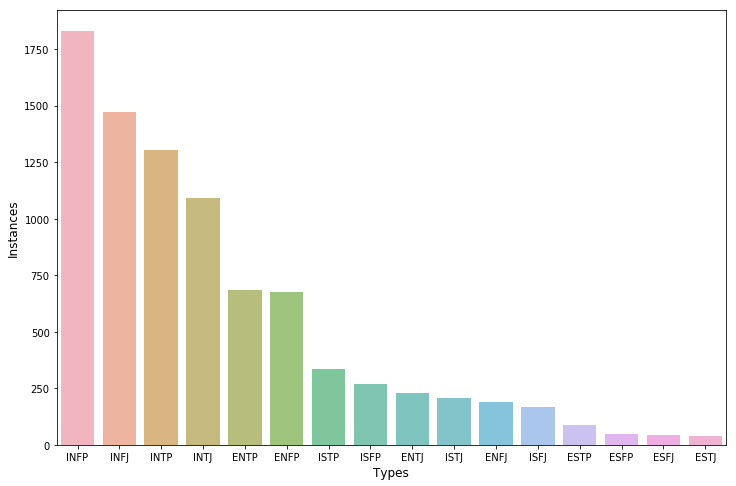

In [218]:
d = data['type'].value_counts()
k = data['type'].value_counts().keys()

plt.figure(figsize=(12,8))
sns.barplot(d.index, d.values, alpha=0.7)
plt.ylabel('Instances', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Clearly Introverted and/ or iNtuitive people dominate the Kaggle forums, or at least the ones participating in the creation of the database.  This will make it quite difficult to learn about those who are extroverted and sensing types (ESxx).  The model would likel minimize error by simply never predicting ESxx labels.

In [219]:
#distribution = {}
#actual_series = {}

l = float(len(data))
actual = [0.044, 0.015, 0.033, 0.021, 0.032, 0.081, 0.054, 0.088, 0.018, 0.116, 0.025, 0.138, 0.043, 0.085, 0.123, 0.087]
kaggle = []

for i in range(len(d)):
    kaggle.append(float(d[i]) / l)

keys = d.index.get_values()
values = d.get_values()


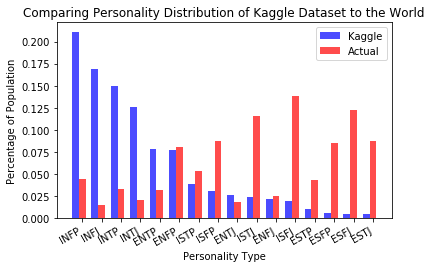

In [220]:
from matplotlib import style 

fig, ax = plt.subplots(1) 
fig.autofmt_xdate()
index = np.arange(16)
bar_width = 7
opacity = 0.7

kaggle_bar = plt.bar(index*20, kaggle, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Kaggle')
actual_bar = plt.bar(index*20 + bar_width, actual, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Actual')

plt.xlabel('Personality Type')
plt.ylabel('Percentage of Population')
plt.title('Comparing Personality Distribution of Kaggle Dataset to the World')
plt.xticks(index*20 + bar_width, keys)
plt.legend()
plt.show()



The bar graph above compares the percentage of people who belong to each type on the Kaggle database and Myers-Briggs world estimates.  If the data weren't already skewed enough, the people's personalities of this dataset are quite different to the general population.  When it comes to creating a system for understanding personality, the data used to train the model would ideally represent the population of personalities it is trying to understand.

Insert Facets

### Algorithms and Techniques

Preprocessing the data will be the largest part of the technique for predicting the personality of a person based on their text.  There are separating characters (|||) that need to be removed, links that will not show up in language and instead will be converted simply into the word 'link'.  

As mentioned in the Data Exploration section above, using the bag of words technique to create word vectors of each personality type's language. Using spaCy's medium web language library to create relative frequencies of common language used online, the result will be a model of language use specific to each personality feature.  In addition, spaCy can find the similarities of new sentences to each corresponding personality and even between personalities.  

The classifier is a Convolutional Neural Network, that will run over the language and assign the probability for each class based on their word vector representations and similarities to each personality type.

Since the data is quite skewed not only from the population but especially not distributed evenly throughout the personality types, creating a model that will most accurately predict the personality type will likely result in simply guessing the most likely personality features, in this case Introverted and Intuitive (IN).  Tuning the model based on the AUC and series of 4 binary classifications (which coincidentally also makes more sense in the study of personality) allows to create the most potentially useful prediction model and avoid overfitting.  

Calculating AUC not only tries to get the most predictions right, but tries to ensure that false positives and false negatives don't crop up.  In other words, since the accuracy metric would tend to create a prediction where everyone is IN__, the AUC metric will catch that the model systematically falsely assigns Extroverts the Introvert label and will look for patterns to help correct it.

### Benchmark

The Benchmark I will be using to predict personality based on the data is a Logistic Regression Algoirthm with 10 fold cross validation, as I am trying to make a similar model to Yilun Wang's in his Understanding Personality through Social Media.





# III. Methodology

### Data Preprocessing

(Just upload it from below, this takes a while)

In [ ]:
# Remove any people with posts that have less than 50 posts in them
# Split the posts and save them as an array 
drop_list = []
keep_list = []
type_list = []
#keep_dict = {}
#type_dict = {}



df = data
df['num_posts'] = 0

for i in range(len(df.type)): 
    string = df['posts'][i]
    temp = np.array(string.split('|||'))
    if len(temp) < 50:
        drop_list.append(i)
    if len(temp) >= 50:
        df['num_posts'][i] = 50
        temp = temp[:50]
        keep_list.append(temp)
        type_list.append(df['type'][i])
    if i%1000 == 0:
        print(i)

In [ ]:
print(len(keep_list))
print(len(type_list))


uniform_df = df[df["num_posts"] == 50]
uniform_df.reset_index(drop=False)
print(uniform_df)

frame = pd.DataFrame({
    'posts' : keep_list,
    'type'  : type_list
})


In [ ]:
# Go through each post to remove links
import re
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

for posts in frame.posts:
    for i in range(len(posts)):
        posts[i] = pattern.sub('link', posts[i])
        
print(frame.tail())

In [303]:
def type_to_numbers(type_list):
    
    label_list = []
    for i in type_list:
        if i == 'ENTP':
            label_list.append(0)
        if i == 'INTP':
            label_list.append(7)
        if i == 'ESTP':
            label_list.append(8)
        if i == 'ISTP':
            label_list.append(3)
        if i == 'ENFP':
            label_list.append(4)
        if i == 'INFP':
            label_list.append(5)
        if i == 'ESFP':
            label_list.append(6)
        if i == 'ISFP':
            label_list.append(7)
        if i == 'ENTJ':
            label_list.append(8)
        if i == 'INTJ':
            label_list.append(9)
        if i == 'ESTJ':
            label_list.append(10)
        if i == 'ISTJ':
            label_list.append(11)
        if i == 'ENFJ':
            label_list.append(12)
        if i == 'INFJ':
            label_list.append(13)
        if i == 'ESFJ':
            label_list.append(14)
        if i == 'ISFJ':
            label_list.append(15)
        
    return label_list
    



frame['label'] = type_to_numbers(type_list)
    
print(len(type_list))

7684


In [268]:
def type_to_numbers(type_list):
    
    hot_label_list = []
    for i in type_list:
        if i == 'ENTP':
            hot_label_list.append(np.array([1, 0, 1, 0, 1, 0, 1, 0]))
        if i == 'INTP':
            hot_label_list.append(np.array([0, 1, 1, 0, 1, 0, 1, 0]))
        if i == 'ESTP':
            hot_label_list.append(np.array([1, 0, 0, 1, 1, 0, 1, 0]))
        if i == 'ISTP':
            hot_label_list.append(np.array([ 0, 1, 0, 1, 1, 0, 1, 0]))
        if i == 'ENFP':
            hot_label_list.append(np.array([1, 0, 1, 0, 0, 1, 1, 0]))
        if i == 'INFP':
            hot_label_list.append(np.array([0, 1, 1, 0, 0, 1, 1, 0]))
        if i == 'ESFP':
            hot_label_list.append(np.array([1, 0, 0, 1, 0, 1, 1, 0]))
        if i == 'ISFP':
            hot_label_list.append(np.array([0, 1, 0, 1, 0, 1, 1, 0]))
        if i == 'ENTJ':
            hot_label_list.append(np.array([1, 0, 1, 0, 1, 0, 0, 1]))
        if i == 'INTJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 1, 0, 0, 1]))
        if i == 'ESTJ':
            hot_label_list.append(np.array([1, 0, 0, 1, 1, 0, 0, 1]))
        if i == 'ISTJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 1, 0, 0, 1]))
        if i == 'ENFJ':
            hot_label_list.append(np.array([1, 0, 1, 0, 0, 1, 0, 1]))
        if i == 'INFJ':
            hot_label_list.append(np.array([0, 1, 1, 0, 0, 1, 0, 1]))
        if i == 'ESFJ':
            hot_label_list.append(np.array([1, 0, 0, 1, 0, 1, 0, 1]))
        if i == 'ISFJ':
            hot_label_list.append(np.array([0, 1, 0, 1, 0, 1, 0, 1]))
        
    return hot_label_list
    



frame['hot_label'] = type_to_numbers(type_list)
    
print(len(type_list))

7684


In [178]:
posts_vector_2d_list = []
posts_vector_1d_list = []

for posts in frame.posts:
    p = np.empty((50,300))
    all_posts = ""
    for i in range(len(posts)): 
        string = posts[i].tostring()
        s = string.decode('UTF-32')
        all_posts += s + ". "
        post_doc = nlp(s)
        p[i] = post_doc.vector
    all_posts_doc = nlp(all_posts)
    posts_vector_2d_list.append(p)
    posts_vector_1d_list.append(all_posts_doc.vector)
    if len(posts_vector_1d_list)%1921 == 0:
        print("25%")

25%
25%
25%
25%


In [179]:
print(len(posts_vector_2d_list))
print(len(posts_vector_1d_list))

7684
7684


# Separated into 2 lists:
## 1. with a 1,300 word vector representing the average of all the word vectors from all the words in the person's post of length 7684
## 2. with a 50,300 word vector representing 50 posts where the average of the word vectors from each posts of a person is 1,300 and also has a length of 7684

### See the pd.DataFrames below to see how they are saved
### Notice I also have encoded the 16 types into just simple numbers from 1-16

In [186]:
word_vectors_df = pd.DataFrame({
    'posts' : posts_vector_1d_list,
    'label' : label_list
})

print(word_vectors_df.head())

   label                                              posts
0     14  [-0.02311873, 0.13927716, -0.16686235, -0.0479...
1      1  [-0.02635534, 0.15930974, -0.20861474, -0.0925...
2      2  [-0.033611614, 0.183018, -0.18702613, -0.08562...
3     10  [-0.034763753, 0.18936357, -0.19607021, -0.088...
4      9  [-0.081055716, 0.15768416, -0.18289337, -0.093...


In [185]:
word_tensors_df = pd.DataFrame({
    'posts' : posts_vector_2d_list,
    'label' : label_list
})

print(word_tensors_df.head())

   label                                              posts
0     14  [[-0.2548750042915344, 0.14718499779701233, -0...
1      1  [[-0.07861513644456863, 0.2492658644914627, -0...
2      2  [[-0.014407179318368435, 0.03320727497339249, ...
3     10  [[0.0036523607559502125, 0.0886211022734642, -...
4      9  [[-0.1215578094124794, 0.3519960045814514, -0....


In [187]:
word_vectors_df.to_csv("word_vectors.csv")
word_tensors_df.to_csv("word_tenors.csv")

In [188]:
wvdf = pd.read_csv("word_vectors.csv")
wtdf = pd.read_csv("word_tenors.csv")
print(wvdf.head())

   Unnamed: 0  label                                              posts
0           0     14  [-2.31187306e-02  1.39277160e-01 -1.66862354e-...
1           1      1  [-2.63553392e-02  1.59309745e-01 -2.08614737e-...
2           2      2  [-3.36116143e-02  1.83017999e-01 -1.87026128e-...
3           3     10  [-3.47637534e-02  1.89363569e-01 -1.96070209e-...
4           4      9  [-8.10557157e-02  1.57684162e-01 -1.82893366e-...


Preprocessing the data includes looping through each post from each person and separating them into their 50 statements at the |||. Then remove the links and keep count for data visualizations later. Take the MBTI type and break it into 0/1 for I/E, S/N, F/T, and J/P respectively so we can predict individual features and functions of personality.

### Implementation

The process for which metrics, algorithms, and techniques were implemented with the given datasets or input data has been thoroughly documented. Complications that occurred during the coding process are discussed.

1. Preprocess the data, splitting the post string into an array of posts and removing any people with less than 50 posts, since the keras NN must be uniform.
2. Remove the links
3. Process each post with SpaCy nlp library turning each post into an average word vector over the words of the post.
4. Save a df of all the posts and their respective person's type for simple classifiers
5. Save a df of each person and their 50, 300 vector of 50 1, 300 posts for keras
5. Split the posts_df into train and test sets
6. Train on Logistic Regression, Random Forrest, and MLPClassifier
7. Test accuracy and AUC of different categories
8. Cross validate
9. Split persons_word_vector_df into train, valid, and test datasets
10. Input into keras
11. Test accuracy 
12. Cross validate

### Refinement

The process of improving upon the algorithms and techniques used is clearly documented. Both the initial and final solutions are reported, along with intermediate solutions, if necessary.





# Results

### Model Evaluation and Validation

The final model’s qualities — such as parameters — are evaluated in detail. Some type of analysis is used to validate the robustness of the model’s solution.




### Justification

The final results are compared to the benchmark result or threshold with some type of statistical analysis. Justification is made as to whether the final model and solution is significant enough to have adequately solved the problem.

Although the final model performed much better than the benchmark, I would not say this solution adequately solves the problem of developing a tool to help understand people's personality through their language. 

In [ ]:
data['e'] = 0
data['n'] = 0
data['t'] = 0
data['p'] = 0

    
for i in range(len(data.type)): #
    if data.type[i]:
        print(data.type[i])
        if data.type[i][0] == 'E':
            data['e'][i] = 1
        if data.type[i][1] == 'N':
            data['n'][i] = 1
        if data.type[i][2] == 'T':
            data['t'][i] = 1
        if data.type[i][3] == 'P':
            data['p'][i] = 1

# Here I am creating my simple models with the 7684 length list of 1,300 arrays

In [189]:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html
#scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [136]:
x_list = []
for i in range(len(x)):
    x_list.append(x[i])

In [215]:
# sometimes I don't do type. Instead, I'll predict data['t'] and calculate AUC, clearly IN are bias in this data set
# type_by_post_list
X_train, X_test, y_train, y_test = train_test_split(posts_vector_1d_list, label_list, test_size=0.25, random_state=42, shuffle=True)

In [216]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

In [217]:
#X_test_train, X_test_t, y_test_train, y_test_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)
#print(X_train.shape)
for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    #auc = metrics.auc(fpr, tpr)
    #print(auc)

LogisticRegression 0.3482561166059344
RandomForestClassifier 0.24622592399791776
MLPClassifier 0.478396668401874


# I am getting about 48% for MLP's which is better than random guessing (6.25% chance) or highest frequency class (about 21%)

## Notice I have to reshape the vector below to get a prediction, I don't quite understand why and the shape may have to do with the problems below

In [200]:
doc = nlp('Whattup')
tester = doc.vector.reshape(1, -1)
prediction = nn_clf.predict(tester)
print(prediction)

[5]


# I can't seem to get the labels one hot encoded

In [266]:
import keras
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
print(num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = X_train[2000:], X_train[:2000]
(y_train, y_valid) = y_train[2000:], y_train[:2000]

# print shape of training set
#print('X_train shape:', X_train.shape)

# print number of training, validation, and test images
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(x_valid.shape[0], 'validation samples')

16


IndexError: index 16 is out of bounds for axis 1 with size 16

# I tried adopting this function to my dataset but I can't figure out what's even happening to it

In [214]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

train_size = int(len(posts_vector_1d_list) * 0.80)
test_size = len(posts_vector_1d_list) - train_size
train, test = posts_vector_1d_list[0:train_size], posts_vector_1d_list[train_size:len(posts_vector_1d_list)]
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

ValueError: cannot reshape array of size 1843500 into shape (6145,1,1)

In [454]:
from keras.layers import Embedding, LSTM
model3 = Sequential()
#model3.add(Embedding(6147, 300))  # Don't understand this part. What am I trying to input here?
#model3.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
#model3.add(Dense(16,activation='relu'))

model3.add(Dense(300, activation='relu', input_shape=(300,)))
#model3.add(Dense(256, activation='relu'))
#model3.add(Dense(128, activation='relu'))
#model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_102 (Dense)            (None, 64)                19264     
_________________________________________________________________
dropout_40 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_41 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
__________

In [304]:
from keras.utils import to_categorical
y_binary = to_categorical(frame['label'], 16)

In [448]:
train = np.array(posts_vector_1d_list)
X_train, X_test, y_train, y_test = train_test_split(train, y_binary, test_size=0.25, random_state=1, shuffle=True)
print(X_train.shape, y_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

(5763, 300)
(5763, 16)


In [455]:
# compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [457]:
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath='CNN.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model3.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 4034 samples, validate on 1729 samples
Epoch 1/100
 - 2s - loss: 1.9299 - acc: 0.3000 - val_loss: 1.9518 - val_acc: 0.2840

Epoch 00001: val_loss improved from inf to 1.95182, saving model to CNN.weights.best.hdf5
Epoch 2/100
 - 2s - loss: 1.9244 - acc: 0.3039 - val_loss: 1.9552 - val_acc: 0.2828

Epoch 00002: val_loss did not improve
Epoch 3/100
 - 2s - loss: 1.9143 - acc: 0.3166 - val_loss: 1.9487 - val_acc: 0.2909

Epoch 00003: val_loss improved from 1.95182 to 1.94872, saving model to CNN.weights.best.hdf5
Epoch 4/100
 - 2s - loss: 1.9229 - acc: 0.3079 - val_loss: 1.9528 - val_acc: 0.2967

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 2s - loss: 1.9040 - acc: 0.3024 - val_loss: 1.8979 - val_acc: 0.3094

Epoch 00005: val_loss improved from 1.94872 to 1.89786, saving model to CNN.weights.best.hdf5
Epoch 6/100
 - 2s - loss: 1.9095 - acc: 0.3133 - val_loss: 1.9010 - val_acc: 0.3054

Epoch 00006: val_loss did not improve
Epoch 7/100
 - 2s - loss: 1.9002 - acc: 0.3260 - v

Epoch 00059: val_loss improved from 1.82409 to 1.81855, saving model to CNN.weights.best.hdf5
Epoch 60/100
 - 2s - loss: 1.7304 - acc: 0.3783 - val_loss: 1.8310 - val_acc: 0.3522

Epoch 00060: val_loss did not improve
Epoch 61/100
 - 2s - loss: 1.7226 - acc: 0.3862 - val_loss: 1.8219 - val_acc: 0.3574

Epoch 00061: val_loss did not improve
Epoch 62/100
 - 2s - loss: 1.7271 - acc: 0.3830 - val_loss: 1.8312 - val_acc: 0.3511

Epoch 00062: val_loss did not improve
Epoch 63/100
 - 2s - loss: 1.7315 - acc: 0.3837 - val_loss: 1.8112 - val_acc: 0.3534

Epoch 00063: val_loss improved from 1.81855 to 1.81121, saving model to CNN.weights.best.hdf5
Epoch 64/100
 - 2s - loss: 1.7146 - acc: 0.3919 - val_loss: 1.8474 - val_acc: 0.3580

Epoch 00064: val_loss did not improve
Epoch 65/100
 - 2s - loss: 1.7306 - acc: 0.3785 - val_loss: 1.8339 - val_acc: 0.3592

Epoch 00065: val_loss did not improve
Epoch 66/100
 - 2s - loss: 1.7170 - acc: 0.3832 - val_loss: 1.9356 - val_acc: 0.3216

Epoch 00066: val_los

In [451]:
# load the model weights that had the best validation score

model3.load_weights('CNN.weights.best.hdf5')

In [453]:
score = model3.evaluate(X_test, y_test, verbose = 0)
print('\nTest accuracy: ', score[1])


Test accuracy:  0.5023425299323269
[1.595282998201687, 0.5023425299323269]


###  Anything below is just code from me messing around too much and getting off task.

In [380]:
EN_word_vector = []

extroverts = data.loc[data['e'] == 1]
introverts = data.loc[data['e'] == 0]

intuitive_introverts = introverts.loc[data['n'] == 1]
intuitive_extroverts = extroverts.loc[data['n'] == 1]

for i in intuitive_extroverts.index:
    persons_comments = ""
    for post in intuitive_extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    EN_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EN_word_vector, intuitive_extroverts['t'], test_size=0.25, random_state=42, shuffle=True)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.neural_network import MLPClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
IN_word_vector = []

for i in intuitive_introverts.index:
    persons_comments = ""
    for post in intuitive_introverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    IN_word_vector.append(doc.vector)
    if i%200 == 0:
        print(i)
        
X_train, X_test, y_train, y_test = train_test_split(IN_word_vector, intuitive_introverts['t'], test_size=0.25, random_state=42, shuffle=True)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nn_clf = MLPClassifier()

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    y_pred = clf.predict(E_word_vector)
    print(clf.__class__.__name__, accuracy_score(extroverts['t'], y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(extroverts['t'], y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)
    
    
E_word_vector = []
for i in extroverts.index:
    persons_comments = ""
    for post in extroverts.posts[i]:
        persons_comments += post + ". "
    doc = nlp(persons_comments)
    E_word_vector.append(doc.vector)
    if i%500 == 0:
        print(i)
        
y_pred = nn_clf.predict(E_word_vector)
print(clf.__class__.__name__, accuracy_score(extroverts['p'], y_pred))
fpr, tpr, thresholds = metrics.roc_curve(extroverts['p'], y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

KeyError: 'e'

# V. Conclusion

### Free Form Visualization

A visualization has been provided that emphasizes an important quality about the project with thorough discussion. Visual cues are clearly defined.

### Reflection

Student adequately summarizes the end-to-end problem solution and discusses one or two particular aspects of the project they found interesting or difficult.

One particular thing I found difficult was preprocessing the data for the Keras/ Tensorflow Neural Network.  For the simple classifiers I had to input a 1D stream of data, whereas I needed 3 dimensions for the LSTM NN. At first I was getting very confused, going back and forth between different preprocessing methods getting one to fit and then not the other. I did not realize that I needed to make two separate datasets in order to make this project work.  However, what I found interesting was that the SpaCy word vectors take into account dependencies and time series when creating word vectors. Since this is information is encapsulated, then the LSTM can focus on more broad patterns than one understanding and predicting the likelihood of seeing the phrase.  Finding the right mix of abstraction of language without losing information in the averaged word vectors will be integral in understanding the patterns of the human psyche through language.

Another interesting thing I had trouble with was one-hot encoding the personality data. Since there are 16 different personality types, one method would be to make each prediction class equivalent to one personality type resulting in an array of length 16. Another way would be to predict whether or not each person was Introverted, Extroverted, iNtuitive, Sensing, Thinking, Feeling, Perceiving, or Judging, resulting in an array of length 8.  Or even take it one step further, since one cannot be both Introverted and Extroverted according to the MBTI, we could assign Extroverted a value of 1 and Introverted a value of 0.  This would result in an array of length 4. 




### Improvement

	
Discussion is made as to how one aspect of the implementation could be improved. Potential solutions resulting from these improvements are considered and compared/contrasted to the current solution.

One aspect of the implementation that could have been improved is cleaning the data in a way that didn't require losing people with less than 50 posts and any post after the 50th one, losing information from links, or result in a skewed distribution of classes in the dataset. 

This way, the most information would be preserved by the corpus of the users and the model would result in a more transferrable prediction to the general population, rather than specifically Kaggle members.

I could also get the tensor for each post or corpus the person has, this would increase the dimensionality of the data further and allow for a convolutional neural network, however, this takes more than 2 days to process on my quad-core processor and requires padding or otherwise losing information in some posts as some people use more words than others.

In [ ]:
#X_test_train, X_test_t, y_test_train, y_test_t = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

for clf in (log_clf, rnd_clf, nn_clf): #svm_clf,
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_train)    
    print(clf.__class__.__name__, accuracy_score(y_test_train, y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print(auc)

nn_clf_2 = MLPClassifier()
#train_np = np.array(X_test_train)
#print(len(train_np))
#guess = y_pred.tolist()

print(X_test_train[0])

array = y_pred.reshape(-1, 1)
df = pd.DataFrame ({
    'vector': np.array(X_test_train,dtype='float32'),
    'pred'  : array
})

#print(X_test_train[:2])
#trainer = zip(X_test_train, guess)
#xtestrain = np.ndarray(list(trainer))
#print(xtestrain)
nn_clf_2.fit(array, y_test_train)
y_pred_2 = nn_clf_2.predict(df)
print(clf.__class__.__name__, accuracy_score(y_test_t, y_pred_2))
fpr, tpr, thresholds = metrics.roc_curve(y_test_train, y_pred_2, pos_label=1)
auc = metrics.auc(fpr, tpr)
print(auc)

In [ ]:
df_vector_list = []
df_label_list = []
df_vector_norm_list = []
df_post_list = []
df_index_list = []
e_list = []
n_list = []
t_list = [] 
p_list = []
word_vectors = []
vector_norms = []


for i in range(len(data.type)):
    # go through each person in the dataframe, with a fresh list of vectors for 
    #persons_comments = ""
    #list_of_vectors = []
    #list_of_vector_norms = []
    persons_comments = ""
    for post in data.posts[i]:
        
    label = [data.iloc[i]['e'], data.iloc[i]['n'], data.iloc[i]['t'], data.iloc[i]['p']]

    for post in data.posts[i]:
        #persons_comments += post + ". "
        persons_comments += post + " "

        doc = nlp(post)
        df_vector_list.append(doc.vector)
        df_vector_norm_list.append(doc.vector_norm)
        df_post_list.append(post)
        df_index_list.append(i)
        df_label_list.append(label)
        e_list.append(label[0])
        n_list.append(label[1])
        t_list.append(label[2]) 
        p_list.append(label[3])
    # after each post has been gone through but before the moving on to the next person
        # I want a list of vector norms to append to df vector norm list
        # I want a vector describing the whole corpus
    #vector.append(doc.vector)
    #print(vectors.dtype)
    #data['word_vectors'][i] = vectors
    doc = nlp(persons_comments)
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    if i%1000 == 0:
        print(float(i)/8675.)if i%500 == 0:
        print(i)

post_data = { 'user_id' :  df_index_list,
              'label'   :  df_label_list,
        'word_vector'   :  df_vector_list,
        'vector_norm'   :  df_vector_norm_list,
             'post'     :  df_post_list,
             'links'    :  df_links_list
             'e'        :  e_list,
             'n'        :  n_list,
             't'        :  t_list,
             'p'        :  p_list
            }
post_df = pd.DataFrame.from_dict(post_data)
print(post_df.head())

for person in data.type:
    if check_E(person):
        if check_N(person):
            if check_T:
                if check_P:
                    label_list.append(1) #[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # ENTP
                else:
                    label_list.append(2) #[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENTJ
            else:
                if check_P:
                    label_list.append(3) #[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENFP
                else:
                    label_list.append(4) #[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ENFJ
                
        else:
            if check_T:
                if check_P:
                    label_list.append(5) #[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESTP
                else:
                    label_list.append(6) #[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESTJ
            else:
                if check_P:
                    label_list.append(7) #[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ESFP
                else:
                    label_list.append(8) #[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # ESFJ
    else:
        if check_N(person):
            if check_T:
                if check_P:
                    label_list.append(9) #[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # INTP
                else:
                    label_list.append(10) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] # INTJ
            else:
                if check_P:
                    label_list.append(11) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] # INFP
                else:
                    label_list.append(12) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] # INFJ
                
        else:
            if check_T:
                if check_P:
                    label_list.append(13) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] # ISTP
                else:
                    label_list.append(14) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] # ISTJ
            else:
                if check_P:
                    label_list.append(15) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] # ISFP
                else:
                    label_list.append(16) #[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # ISFJ
    
print(label_list)


high_dim_vectors = []

for i in range(10):
    persons_hd_vectors = []
    persons_comments = ""
    #    print(data.posts[i])
    #for post in data.posts[i]:
    #    print(post)
    #    persons_comments += post + " "
    print(data.posts[i][:100])
    doc = nlp(data.posts[i][:100])
    persons_hd_vectors.append(doc.tensor)
    print(persons_hd_vectors[].shape)
    
# Go through each post, convert it to a doc.vector and it's associated type
post_list = []
type_by_post_list = []
vector = np.empty((7684, 50, 300))
vector_list = []
i = 0
for posts in frame.posts:
    t = type_dict[i]
    print(t)
    p = np.empty((50,300))
    for j in range(50):
        string = posts[j].tostring()
        strn = string.decode('UTF-16')
        print(strn)
        doc = nlp(strn)
        post_list.append(doc.vector)
        type_by_post_list.append(t)
        p[j] = doc.vector
    vector[i] = p
    vector_list.append(p)
    if i%100 == 0:
        print(i)
    print(i)
    i += 1
    print(i)
    
print(len(post_list))
print(len(type_by_post_list)) 
#print(len(vector))
print(len(vector_list))
#print(len(type_dict))



posts_dict = {
    "label" : type_by_post_list
    "vector" : post_list
}

posts_df = pd.DataFrame.fromdict(posts_dict)
print(posts_df.head())

import re

# Split the data at |||
vector = np.empty((8675, 30, 300))
simple_vector = np.empty(())
drop_list = []

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

for i in range(len(data.posts)):  
    p = np.empty((30,300))
    posts = data.posts[i]
    #print(posts)
    #data.posts[i] = posts.split('|||')
    posts = pattern.sub('link', posts)
    newnew = posts.split('|||')
    if len(newnew) >= 30:
        for j in range(30):
            doc = nlp(newnew[j])
            p[j] = doc.vector
        vector[i] = p
    else:
        #print(i, len(newnew))
        drop_list.append(i)
    if i%1000 == 0:
        print(float(i)/8675., "% done")
        
print(data.head())

word_vectors = []
vector_norms = []
data['e'] = 0
data['n'] = 0
data['t'] = 0
data['p'] = 0
    
for i in range(1): #len(data.type)
    persons_comments = ""
    if data.type[i][0] == 'E':
        data['e'][i] = 1
    if data.type[i][1] == 'N':
        data['n'][i] = 1
    if data.type[i][2] == 'T':
        data['t'][i] = 1
    if data.type[i][3] == 'P':
        data['p'][i] = 1
    #for post in data.posts[i]:
    #    persons_comments += post + " "
    #doc = nlp(persons_comments)
    doc = nlp(data.posts[i])
    word_vectors.append(doc.vector)
    vector_norms.append(doc.vector_norm)
    tester = doc.vector.reshape(1, -1)
    print(tester.shape)
    if i%1000 == 0:
        print(float(i)/8675.)

print(data.tail())


average_vector = []
i=0

for posts in keep_list:
    post = ""
    for p in posts:
        post += p + " "
    doc = nlp(post)
    average_vector.append(doc.vector)
    if i%1000 == 0:
        print(i)
    i += 1
    
    
    
    
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model.add(Conv2D(filters=16, kernel_size=2, activation ='relu', input_shape=(50, 1, 300)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=64, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=2, activation ='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(16, activation='softmax')) #softmax #tanh

model.summary()